Deve responder às questões no notebook entregue. O notebook deve correr até ao final sem erros dentro da pasta enviada, junto à pasta 'data' com os dados (podem testar com *Kernel->Restart Kernel and Run All Cells...*)

Responda às questões e acrescente células com o código que for necessário.

---

# Análise Exploratória de Dados | Avaliação

## Contexto

<img style="float: right;" src="./doc_heart.jpg" width="250" />

Você é Data Scientist num hospital e faz parte de uma equipa que vai trabalhar na previsão de risco de doença cardiovascular em pacientes. O *dataset* abaixo  contém informação sobre alguns indicadores de saúde de pacientes, relacionados com o tema em estudo. Cada linha representa um paciente e cada coluna uma variável em estudo.

### Informação de variáveis:

+ **age**: idade
+ **sex**: género (0: Feminino; 1: Masculino)
+ **cp**: tipo de dor no peito (4 níveis)
+ **trestbps**: pressão sanguínea em repouso
+ **chol**: colesterol no soro (mg/dl)
+ **fbs**: açúcar no sangue em jejum > 120 mg/dl (0/1)
+ **restecg**: resultados do electrocardiograma em repouso (valores 0,1,2)
+ **thalach**: frequência cardíaca máxima atingida
+ **exang**: angina induzida por exercício (0/1)
+ **oldpeak**: depressão ST induzida por exercício relativamente ao repouso
+ **slope**: declive do segmento ST em pico de exercício (0,1,2)
+ **ca**: número de vasos sanguíneos importantes (0-4) coloridos pela fluoroscopia
+ **thal**: Resultado do teste de stress: 0= inconclusivo; 1 = defeito fixo (presente em repouso e stress); 2 = normal; 3 = defeito reversível (ausente em repouso, presente em stress)
+ **target**: presença de doença cardíaca no paciente (0/1)

## Tarefa

A sua tarefa é fazer a preparação e Análise Exploratória destes dados.
A tarefa implica, entre outras coisas, conhecer as variáveis existentes, corrigir o seu tipo, se necessário, e criar as variáveis que acharem (potencialmente) relevantes.
Para o(a) ajudar, foram criadas algumas questões que deverá responder.

[Python Cheatsheet](../../utils/Python_Cheatsheet.pdf)

[Pandas Cheatsheet](../../utils/Pandas_Cheat_Sheet.pdf)

[Numpy Cheatsheet](../../utils/Numpy_Python_Cheat_Sheet.pdf)

In [1]:
# acrescentar os packages que necessitar
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Read data:

In [2]:
df = pd.read_csv(os.path.join('data', 'heart.csv'))

#### **Q1:**

Verifique a informação do *dataset*.
Faça um breve resumo das principais características do mesmo.

#### **Código:**

In [3]:
df.shape

(305, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,57,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
301,45,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
302,68,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
303,57,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
304,57,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       305 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      304 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   304 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 33.5 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,305.000000,303.000000,303.000000,303.000000,304.000000,303.000000,303.000000,304.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.396721,0.683168,0.966997,131.623762,246.634868,0.148515,0.528053,149.526316,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.112058,0.466011,1.032052,17.538143,52.147559,0.356198,0.525860,22.963724,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        153
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df.isnull().sum()

age         0
sex         2
cp          2
trestbps    2
chol        1
fbs         2
restecg     2
thalach     1
exang       2
oldpeak     2
slope       2
ca          2
thal        2
target      2
dtype: int64

#### **Resposta:**

O dataset é composto por 14 colunas e 305 linhas; 13 variáveis são flloat e apenas uma (age) é um integral e existem 13 variáveis com missings.

---

#### **Q2:**

Verifique, se ainda não o fez, se existem valores em falta (*missing data*) em alguma das variáveis.
Procure perceber como são esses casos e qual a melhor estratégia para lidar com os mesmos.
<br>
Implemente essa estratégia.

In [10]:
df.isnull().sum()

age         0
sex         2
cp          2
trestbps    2
chol        1
fbs         2
restecg     2
thalach     1
exang       2
oldpeak     2
slope       2
ca          2
thal        2
target      2
dtype: int64

In [11]:
df[df["sex"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,47,NaN,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN
285,71,NaN,NaN,NaN,359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,47,NaN,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN
285,71,NaN,NaN,NaN,359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Existem 2 pacientes, sem a maioria de informação para várias variáveis, logo o melhor é eliminar esses pacientes.

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 304
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 35.5 KB


Já não existem mais missings no nosso df

---

#### **Q3:**
Calcule o número de valores únicos por variável.<br/>
Com base nesse número, indique que variáveis serão potenciais 'candidatas' a categóricas.

In [15]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

**Resposta** </br>
Variável:
- sex (masculino e feminino);
- cp (nível 1,2,3,4);
- fbs (presença ou não de açúcar em jejum);
- restecg (valor 0,1,2)
- exang (presença ou não de angina)
- slope (declive 0,1,2)
- ca (número de vasos 0,1,2,3,4)
- thal (resultado inconclusivo, defeito fixo, normal, defeito reversível)
- target (presença ou não de doença cardíaca)

---

#### **Q4:**

Com base na resposta à questão anterior e/ou à descrição das variáveis, sugira uma possível categorização por tipo. Para tal, crie listas onde coloca o nome das variáveis de cada tipo.
```python
categoricas=[]  # variáveis categóricas (inclui boolean)
numericas=[]    # variáveis numéricas
```

**Bonus:**</br>
Indique quais as variáveis categóricas que podem ser ordinais

In [16]:
categoricas=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numericas=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Resposta Bónus** </br>
As variáveis categóricas que podem ser ordinais podem ser: cp, restecg, slope, ca

---

#### **Q5:**

Calcule a concentração média de colesterol encontrado em cada grupo de pacientes definido pelo cruzamento das variáveis *sex* e *thal*.<br>
Em que grupo esse valor é maior?

In [17]:
df.groupby(['sex','thal'])['chol'].mean().reset_index()

,sex,thal,chol
0,0.0,0.0,216.000000
1,0.0,1.0,225.000000
2,0.0,2.0,254.759494
3,0.0,3.0,301.200000
4,1.0,0.0,204.000000
5,1.0,1.0,227.117647
6,1.0,2.0,238.137931
7,1.0,3.0,242.647059


In [18]:
df.groupby(['sex','thal'])['chol'].mean().reset_index()['chol'].idxmax()

3

**Resposta** </br>
O Grupo com o valor maior de colesterol são as mulhers com o resultado de stress defeito reversível

---

#### **Q6:**
Verifique, através de um boxplot, se existem outliers na variável _'chol'_. Se existirem, procure saber quantos são e adicione uma coluna à tabela que os identifique.

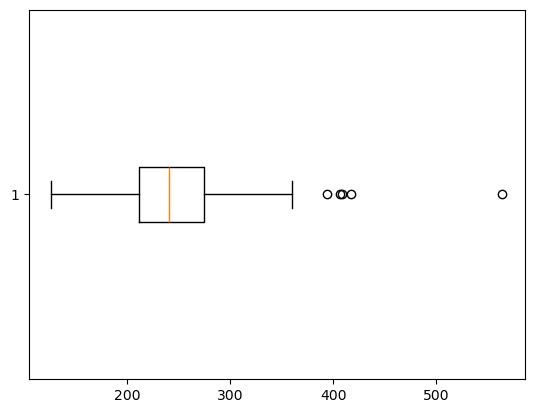

In [21]:
plt.boxplot(df["chol"], vert=False)
plt.show()

Existem outliers na variável chol

In [26]:
q1, q3 = np.percentile(df["chol"], [25, 75])
iqr = q3 - q1
print(q1, q3, iqr)

211.0 274.5 63.5


In [27]:
lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print(lb, ub)
df['outlier'] = (df["chol"] < lb) | (df["chol"]> ub)

115.75 369.75


In [28]:
df[df['outlier'] == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,outlier
28,65,0.0,2.0,140.0,417.0,1.0,0.0,157.0,0.0,0.8,2.0,1.0,2.0,1.0,True
85,67,0.0,2.0,115.0,564.0,0.0,0.0,160.0,0.0,1.6,1.0,0.0,3.0,1.0,True
96,62,0.0,0.0,140.0,394.0,0.0,0.0,157.0,0.0,1.2,1.0,0.0,2.0,1.0,True
220,63,0.0,0.0,150.0,407.0,0.0,0.0,154.0,0.0,4.0,1.0,3.0,3.0,0.0,True
246,56,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0.0,True


In [29]:
df['outlier'].value_counts()

outlier
False    298
True       5
Name: count, dtype: int64

**Resposta** </br>
Existem 5 outliers no df

---

#### **Q7:**
Das variáveis numéricas, qual(is) parece(m) ajudar melhor a identificar uma de doença cardiovascular? (palavra-chave: *pairplot*)</br>
Existe algum par de variáveis cuja interação seja útil na identificação de doença cardiovascular? Se sim, qual (quais)?

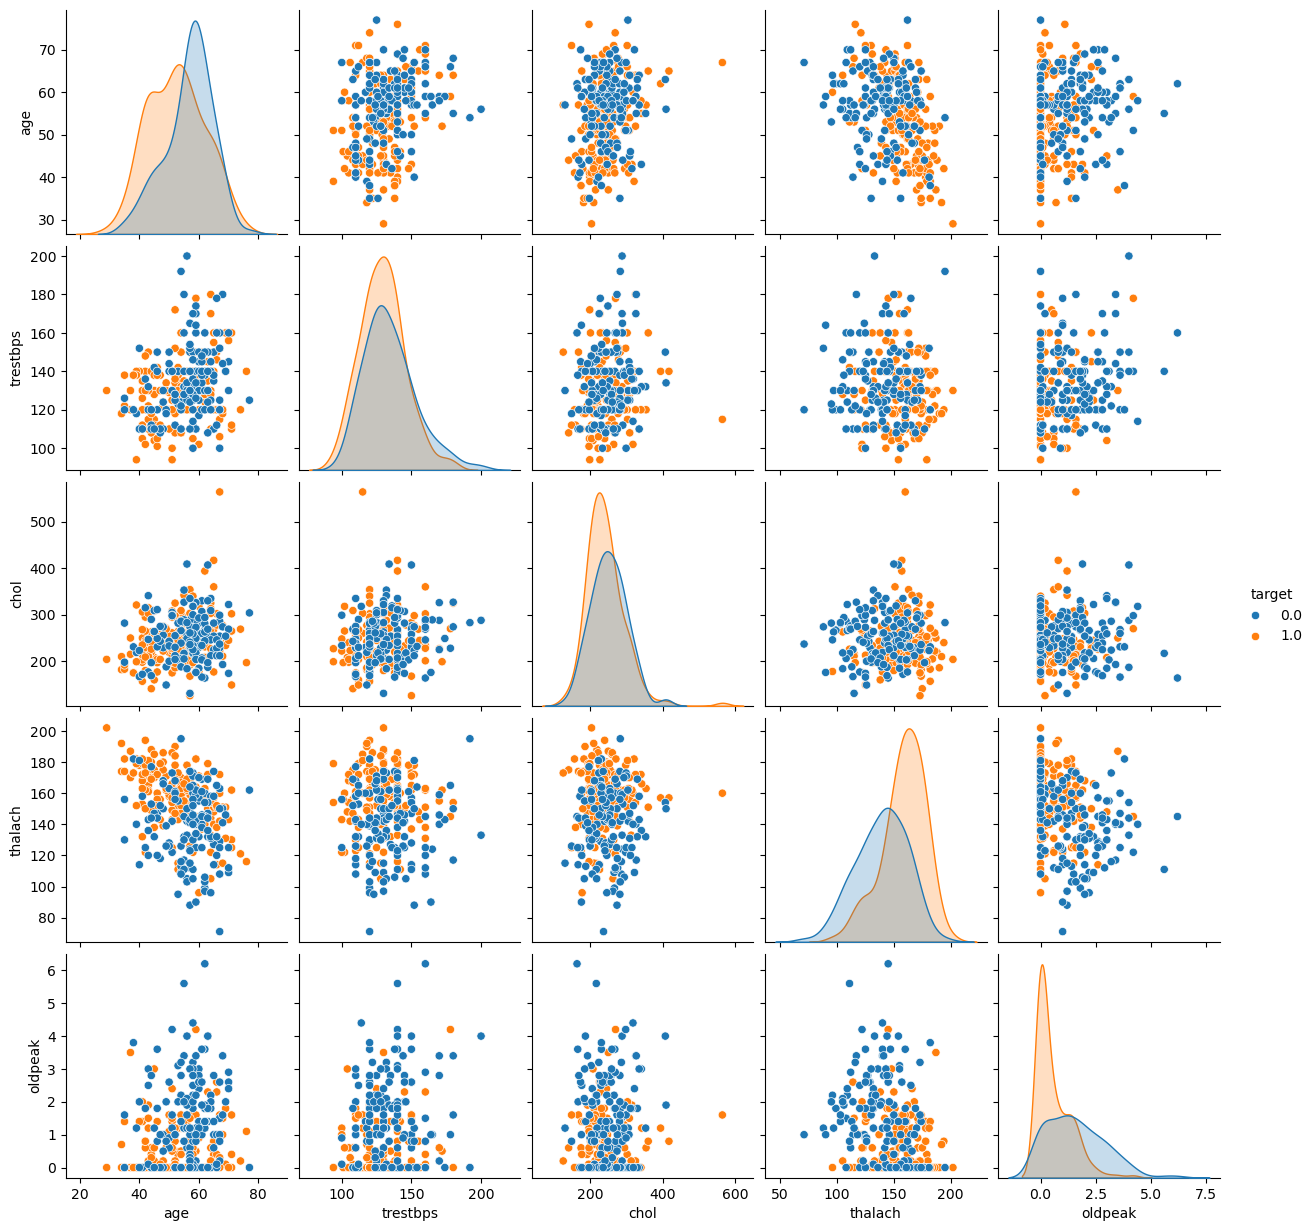

In [30]:
sns.pairplot(df[numericas + ['target']], hue='target')
plt.show()

**Resposta** </br>
A variável numérica que melhor identifica uma doença cardiovascular é a thalach: frequência cardíaca máxima atingida, quanto maior é esta variável, maior a probabilidade de ter uma doença cardiovascular.
Adicionalmente, não há nenhum par de variáveis que identifiquem a doença, pois os pontos estão muito dispersos.

---

#### **Q8:**

Em relação às variáveis categóricas (inclui *boolean*), quais terão maior potencial preditivo? Analise cuidadosamente os resultados.<br/>
(**Sugestão:** Para cada variável categórica, calcule a % de *True* na variável *target* em cada categoria - preferencialmente com representação gráfica)

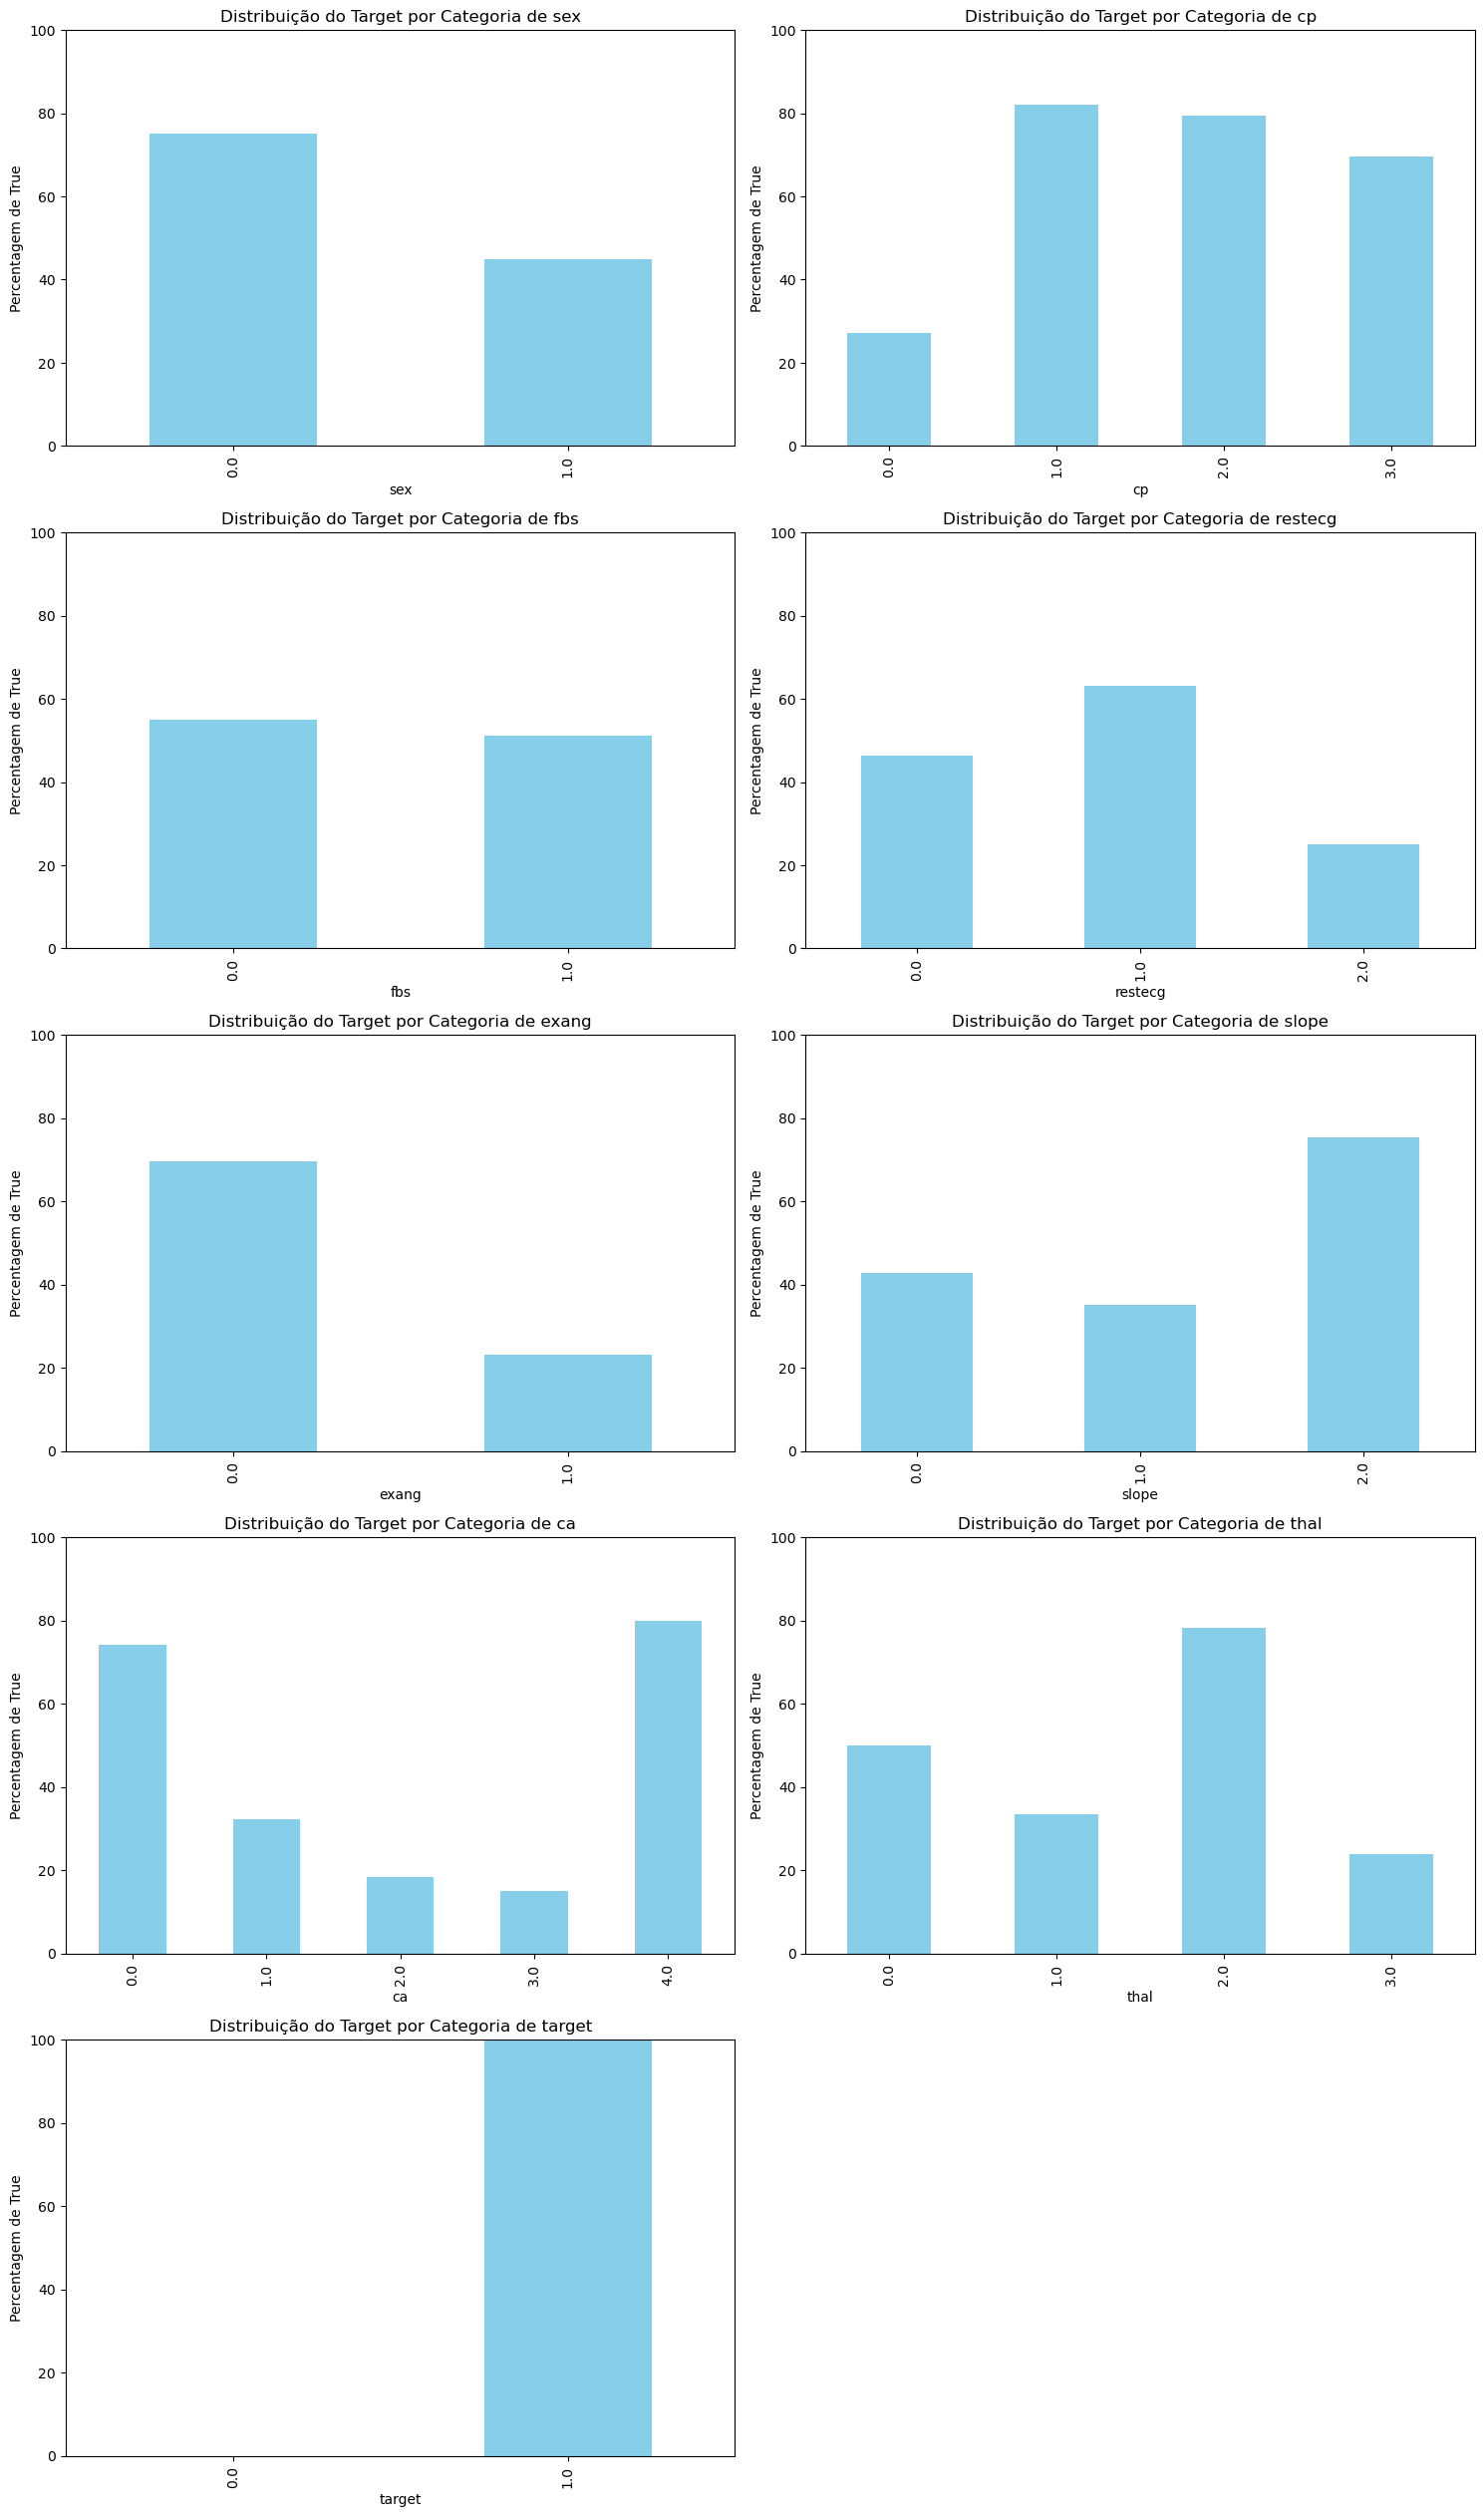

In [38]:
target_true = {}
for coluna in categoricas: 
    percentagens = df.groupby(coluna)['target'].mean() * 100
    target_true[coluna] = percentagens

num_linhas = len(categoricas)
num_colunas = 2
plt.figure(figsize=(15, 5 * num_linhas))

for i, (coluna, percentagens) in enumerate(target_true.items(), 1):
    plt.subplot(num_linhas, num_colunas, i)
    percentagens.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição do Target por Categoria de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Percentagem de True')
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()


**Resposta** </br>

 Todas as As variávetem um grandeior potêncial predit. 
 - Para a variável Sex: as mulheres tem uma percentagem de quase 80% para ter doenças cardiovasculares;
 - Para a variável cp: os níveis de dor 1 e 2 tem mais predisposição para ter doenças cardiovasculares;
 - Para a variável fbs: com ou sem os níveis de açúcar a propenção a ter doenças cardiovasculares é praticamente a mesma;
 - Para a variável restecg: os resultado com valor 1 tem maior propenção a ter doenças cardiovasculares;
 - Para a variável exang: quando não há angina induzida no exercício, existe uma maior propenção a ter doenças cardiovasculares;
 - Para a variável slope: o declive 2 é mais propenso a ter doenças cardiovasculares;
 - Para a variável ca: o número de vasos sanguíneos 0 e 4 importantes é mais propenso a ter doenças cardiovasculares;
 - Para a variável thal: o resultado do teste de stress normal é mais propenso a ter doenças cardiovasculares;

Posto isto, penso que as variáveis com maior potêncial preditivo são: cp, thal, ca e slope.
 cp

---